In [306]:
import pandas as pd
import numpy as np
from pandas import *

In [307]:
wine = pd.read_csv('marketing_campaign.csv', sep = '\t')
wine.dropna(inplace = True)

In [308]:
wine.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [178]:
for i, n in enumerate(wine.columns):
    print(f'{i}:{n}')

0:ID
1:Year_Birth
2:Education
3:Marital_Status
4:Income
5:Kidhome
6:Teenhome
7:Dt_Customer
8:Recency
9:MntWines
10:MntFruits
11:MntMeatProducts
12:MntFishProducts
13:MntSweetProducts
14:MntGoldProds
15:NumDealsPurchases
16:NumWebPurchases
17:NumCatalogPurchases
18:NumStorePurchases
19:NumWebVisitsMonth
20:AcceptedCmp3
21:AcceptedCmp4
22:AcceptedCmp5
23:AcceptedCmp1
24:AcceptedCmp2
25:Complain
26:Z_CostContact
27:Z_Revenue
28:Response


In [309]:
wine = wine.drop(wine.columns[10:].append(wine.columns[5:8]), axis=1)

In [310]:
wine = wine.drop(columns = 'ID')
wine= wine.drop(columns = ['Recency'])

In [311]:
year = wine["Year_Birth"]
age = 2022 - year
wine["Age"] = age

In [312]:
wine = wine.drop(columns = 'Year_Birth')

In [313]:
wine['Marital_Status'] = wine['Marital_Status'].replace(['Single', 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 0 )
wine['Marital_Status'] = wine['Marital_Status'].replace(['Together', 'Married'], 1)

In [314]:
wine['Education'] = wine['Education'].replace(['2n Cycle'], "Master")

In [315]:
wine = pd.get_dummies(wine, columns = ['Education'], drop_first = True)

In [316]:
Amnt_wine = wine['MntWines']
wine['MntWines'] = Amnt_wine/2   #wielkość wydatków na wino przedstawiona w ujęciu 2 letnim, uśredniamy wielkość aby pokazać roczne wydatki

In [317]:
wine.drop(wine[wine["MntWines"] == 0].index, inplace = True)

In [318]:
 #usunięcie obserwacji odstających
wine.drop(index = wine.index[wine['Age']>100], inplace = True)

In [203]:
wine.drop(index = wine.index[wine['Income']>500000], inplace = True)

In [319]:
wine.reset_index(inplace = True, drop = True)

In [320]:
wine

,Marital_Status,Income,MntWines,Age,Education_Graduation,Education_Master,Education_PhD
0,0,58138.0,317.5,65,1,0,0
1,0,46344.0,5.5,68,1,0,0
2,1,71613.0,213.0,57,1,0,0
3,1,26646.0,5.5,38,1,0,0
4,1,58293.0,86.5,41,0,0,1
...,...,...,...,...,...,...,...
2195,1,61223.0,354.5,55,1,0,0
2196,1,64014.0,203.0,76,0,0,1
2197,0,56981.0,454.0,41,1,0,0
2198,1,69245.0,214.0,66,0,1,0


In [321]:
wine.describe()

,Marital_Status,Income,MntWines,Age,Education_Graduation,Education_Master,Education_PhD
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,0.646364,52437.899091,153.478409,53.130455,0.505909,0.254091,0.218182
std,0.478207,25111.529623,168.740819,11.681104,0.500079,0.435448,0.413105
min,0.000000,1730.000000,0.500000,26.000000,0.000000,0.000000,0.000000
25%,0.000000,35683.500000,12.375000,45.000000,0.000000,0.000000,0.000000
50%,1.000000,51533.000000,89.500000,52.000000,1.000000,0.000000,0.000000
75%,1.000000,68655.500000,253.625000,63.000000,1.000000,1.000000,0.000000
max,1.000000,666666.000000,746.500000,82.000000,1.000000,1.000000,1.000000


In [322]:
wine["MntWines"].describe()

count    2200.000000
mean      153.478409
std       168.740819
min         0.500000
25%        12.375000
50%        89.500000
75%       253.625000
max       746.500000
Name: MntWines, dtype: float64

In [323]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [29]:
skew(wine['MntWines'])

1.1636012788325005

In [30]:
kurtosis(wine['MntWines'])

0.5651361060685676

In [26]:
wine.corr(method='pearson')

,Marital_Status,Income,MntWines,Age,Education_Graduation,Education_Master,Education_PhD
Marital_Status,1.000000,-0.007073,-0.009728,0.005323,-0.012512,0.025715,-0.011920
Income,-0.007073,1.000000,0.686644,0.195827,0.005227,-0.023955,0.096930
MntWines,-0.009728,0.686644,1.000000,0.162048,-0.063036,-0.030893,0.155676
Age,0.005323,0.195827,0.162048,1.000000,-0.067064,-0.004381,0.121364
Education_Graduation,-0.012512,0.005227,-0.063036,-0.067064,1.000000,-0.590502,-0.534466
Education_Master,0.025715,-0.023955,-0.030893,-0.004381,-0.590502,1.000000,-0.308508
Education_PhD,-0.011920,0.096930,0.155676,0.121364,-0.534466,-0.308508,1.000000


In [324]:
import seaborn as sns

<AxesSubplot:>

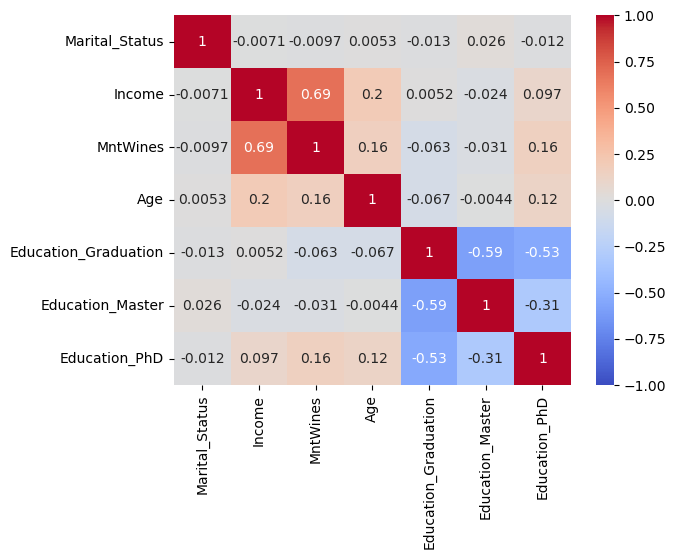

In [33]:
sns.heatmap(wine.corr(method = 'pearson'), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')

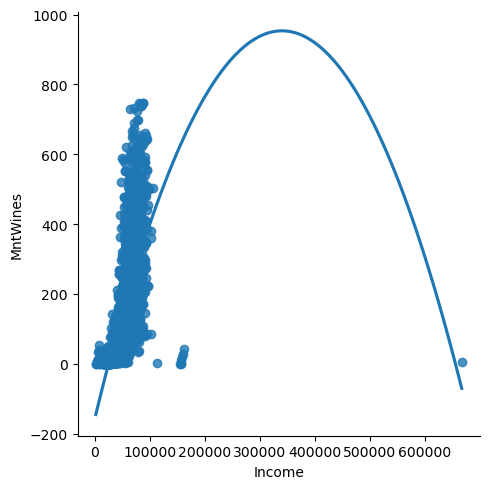

In [325]:
sns.lmplot(x = 'Income', y = 'MntWines', data = wine,  ci = False, order = 2)

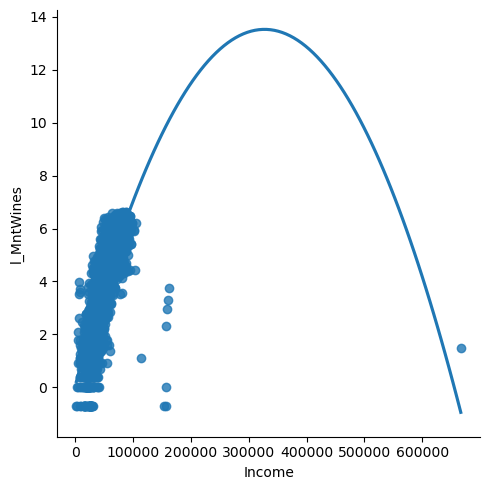

In [333]:
sns.lmplot(x = 'Income', y = 'l_MntWines', data = wine,  ci = False, order = 2)

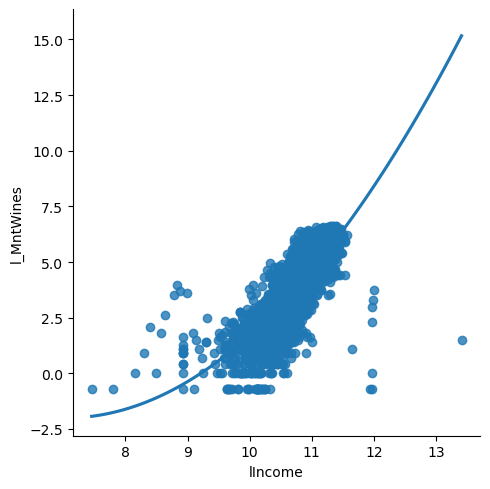

In [334]:
sns.lmplot(x = 'lIncome', y = 'l_MntWines', data = wine,  ci = False, order = 2)

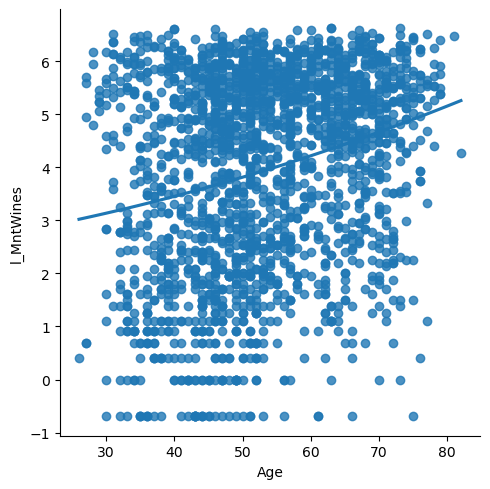

In [335]:
sns.lmplot(x = 'Age', y = 'l_MntWines', data = wine,  ci = False, order = 2)

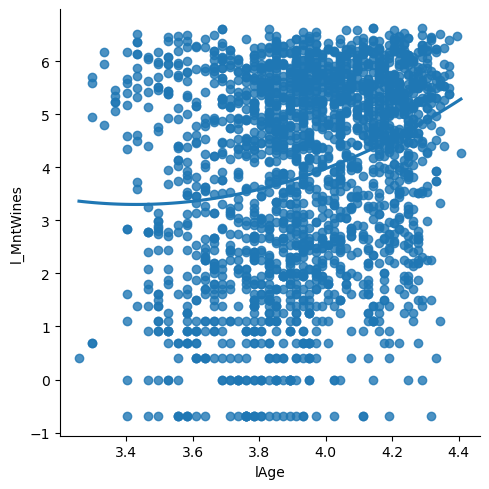

In [397]:
sns.lmplot(x = 'lAge', y = 'l_MntWines', data = wine,  ci = False, order = 2)

In [327]:
import math 

In [328]:
def calculate_log(x):
    if x != 0:
        return math.log(x)
    return "error"

In [329]:
converted_mntwines = wine['MntWines'].map(calculate_log)

In [330]:
wine['l_MntWines'] = converted_mntwines

In [331]:
wine['lIncome']=wine['Income'].map(calculate_log)

In [332]:
wine['lAge']=wine['Age'].map(calculate_log)

In [24]:
wine

,Marital_Status,Income,MntWines,Age,Education_Graduation,Education_Master,Education_PhD,l_MntWines,lIncome,lAge
0,0,58138.0,317.5,65,1,0,0,5.760478,10.970575,4.174387
1,0,46344.0,5.5,68,1,0,0,1.704748,10.743847,4.219508
2,1,71613.0,213.0,57,1,0,0,5.361292,11.179032,4.043051
3,1,26646.0,5.5,38,1,0,0,1.704748,10.190394,3.637586
4,1,58293.0,86.5,41,0,0,1,4.460144,10.973237,3.713572
...,...,...,...,...,...,...,...,...,...,...
2219,1,61223.0,354.5,55,1,0,0,5.870708,11.022278,4.007333
2220,1,64014.0,203.0,76,0,0,1,5.313206,11.066857,4.330733
2221,0,56981.0,454.0,41,1,0,0,6.118097,10.950473,3.713572
2222,1,69245.0,214.0,66,0,1,0,5.365976,11.145406,4.189655


In [337]:
from pylab import *

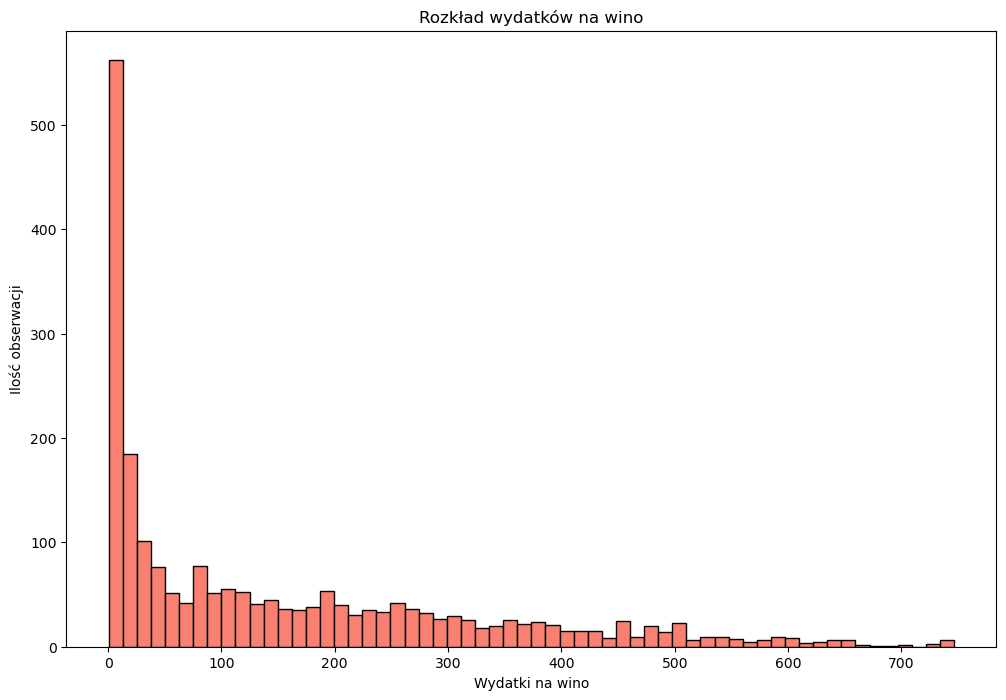

In [338]:
hist(wine["MntWines"], bins = 60, edgecolor = 'black', color = 'salmon')
plt.xlabel('Wydatki na wino')
plt.ylabel('Ilość obserwacji')
plt.title('Rozkład wydatków na wino')
plt.savefig('MntWines.png')
show()

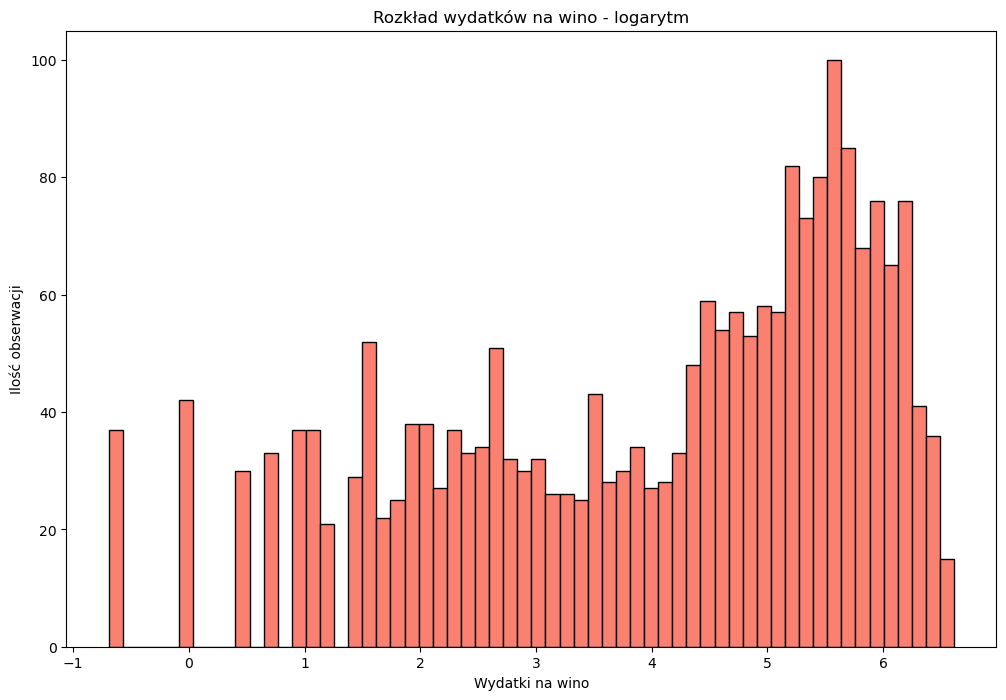

In [339]:
hist(wine["l_MntWines"], bins = 60, edgecolor = 'black', color = 'salmon')
plt.xlabel('Wydatki na wino')
plt.ylabel('Ilość obserwacji')
plt.title('Rozkład wydatków na wino - logarytm')
plt.savefig('l_MntWines.png')
show()

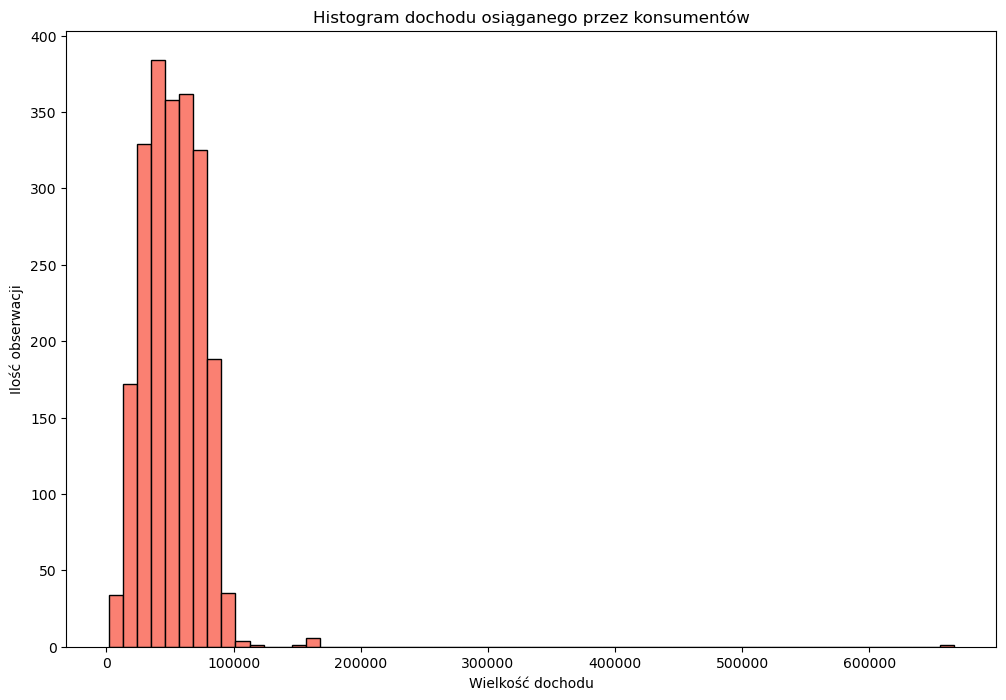

In [340]:
hist(wine["Income"], bins = 60, edgecolor = 'black', color = 'salmon')
plt.xlabel('Wielkość dochodu')
plt.ylabel('Ilość obserwacji')
plt.title('Histogram dochodu osiąganego przez konsumentów')
plt.savefig('Income.png')
show()

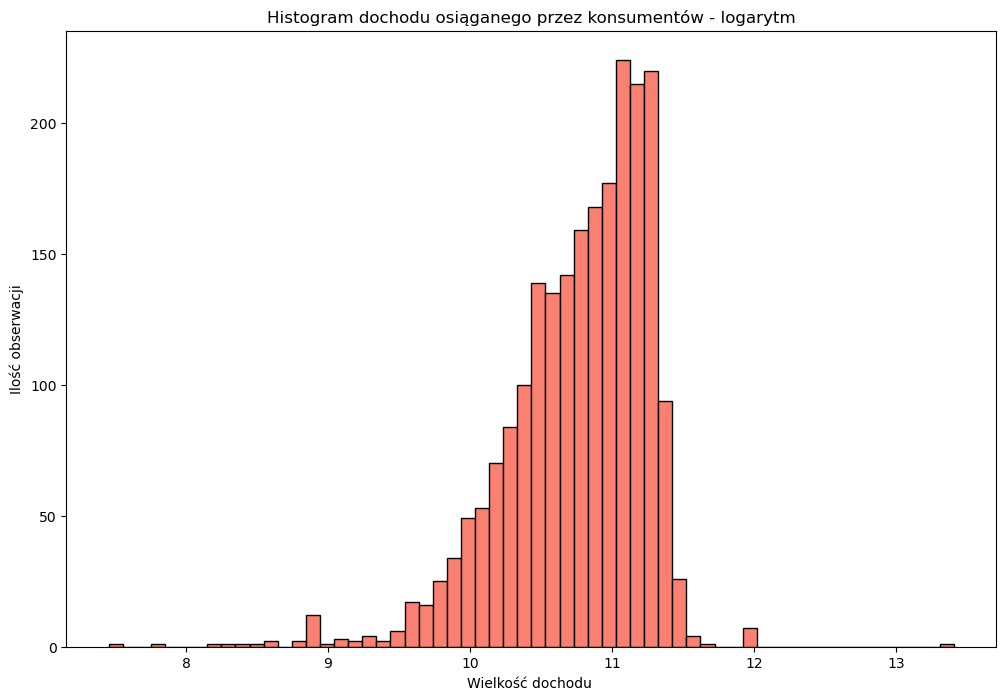

In [341]:
hist(wine["lIncome"], bins = 60, edgecolor = 'black', color = 'salmon')
plt.xlabel('Wielkość dochodu ')
plt.ylabel('Ilość obserwacji')
plt.title('Histogram dochodu osiąganego przez konsumentów - logarytm')
plt.savefig('lIncome.png')
show()

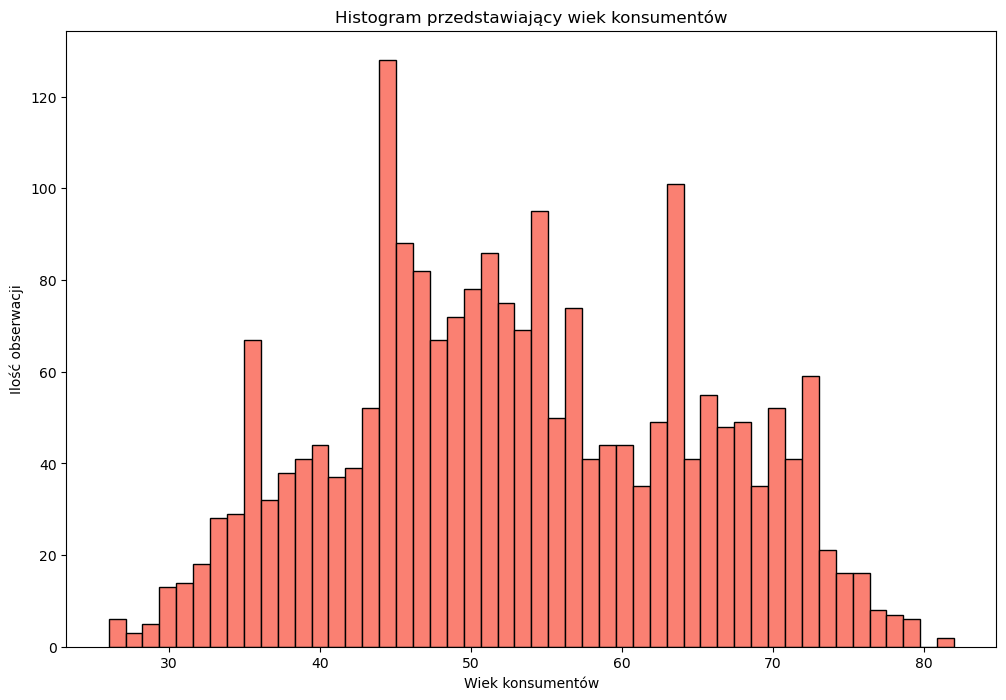

In [342]:
hist(wine["Age"], bins = 50, edgecolor = 'black', color = 'salmon')
plt.xlabel('Wiek konsumentów')
plt.ylabel('Ilość obserwacji')
plt.title('Histogram przedstawiający wiek konsumentów')
plt.savefig('Age.png')
show()

In [58]:
wine.columns

Index(['Marital_Status', 'Income', 'MntWines', 'Age', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'l_MntWines', 'lIncome'],
      dtype='object')

In [343]:
wine['Income_2']=wine['Income']* wine['Income']

In [344]:
wine['Age_2']=wine['Age']* wine['Age']

In [345]:
wine.head()

,Marital_Status,Income,MntWines,Age,Education_Graduation,Education_Master,Education_PhD,l_MntWines,lIncome,lAge,Income_2,Age_2
0,0,58138.0,317.5,65,1,0,0,5.760478,10.970575,4.174387,3.380027e+09,4225
1,0,46344.0,5.5,68,1,0,0,1.704748,10.743847,4.219508,2.147766e+09,4624
2,1,71613.0,213.0,57,1,0,0,5.361292,11.179032,4.043051,5.128422e+09,3249
3,1,26646.0,5.5,38,1,0,0,1.704748,10.190394,3.637586,7.100093e+08,1444
4,1,58293.0,86.5,41,0,0,1,4.460144,10.973237,3.713572,3.398074e+09,1681


In [346]:
import statsmodels.formula.api as smf

In [361]:
m1 = smf.ols(formula = 'MntWines ~ Income +Income_2 + Age + Age_2 + Marital_Status + Education_Graduation +Education_Master +Education_PhD', data = wine).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MntWines   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     264.7
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          4.32e-315
Time:                        17:48:45   Log-Likelihood:                -13660.
No. Observations:                2200   AIC:                         2.734e+04
Df Residuals:                    2191   BIC:                         2.739e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -63.5179     50.767     -1.251      0.211    -163.075      36.039
Income                   0.0065      0.000     42.229      0.000       0.006       0.007
Income_2             -9.504e-09   3.84e-10    -24.741      0.000   -1.03e-08   -8.75e-09
Age                     -2.5691      1.876     -1.370      0.171      -6.247       1.109
Age_2                    0.0256      0.017      1.476      0.140      -0.008       0.060
Marital_Status          -1.0075      5.384     -0.187      0.852     -11.565       9.550
Education_Graduation   -40.2886     18.311     -2.200      0.028     -76.198      -4.379
Education_Master       -33.6386     18.641     -1.805      0.071     -70.195       2.918
Education_PhD           -2.0203     18.925     -0.107      0.915     -39.134      35.093
==============================================================================
Omnibus:                      241.384   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1109.453
Skew:                           0.430   Prob(JB):                    1.22e-241
Kurtosis:                       6.371   Cond. No.                     2.07e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [348]:
m1_1 = smf.ols(formula = 'l_MntWines ~ lIncome + Age + Marital_Status + Education_Graduation +Education_Master +Education_PhD', data = wine).fit()
m1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_MntWines   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     618.4
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:46:01   Log-Likelihood:                -3392.1
No. Observations:                2200   AIC:                             6798.
Df Residuals:                    2193   BIC:                             6838.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -27.1427      0.523    -51.873      0.000     -28.169     -26.117
lIncome                  2.7323      0.051     53.302      0.000       2.632       2.833
Age                      0.0108      0.002      5.074      0.000       0.007       0.015
Marital_Status          -0.0290      0.051     -0.574      0.566      -0.128       0.070
Education_Graduation     1.1139      0.173      6.442      0.000       0.775       1.453
Education_Master         1.1225      0.176      6.377      0.000       0.777       1.468
Education_PhD            1.3853      0.179      7.744      0.000       1.034       1.736
==============================================================================
Omnibus:                      550.032   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3931.544
Skew:                          -0.986   Prob(JB):                         0.00
Kurtosis:                       9.245   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [349]:
m1_1_1 = smf.ols(formula = 'l_MntWines ~ Income+Income_2 + Age + Marital_Status + Education_Graduation +Education_Master +Education_PhD', data = wine).fit()
m1_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_MntWines   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     577.0
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:46:08   Log-Likelihood:                -3332.2
No. Observations:                2200   AIC:                             6680.
Df Residuals:                    2192   BIC:                             6726.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.7814      0.187     -9.533      0.000      -2.148      -1.415
Income                7.719e-05    1.4e-06     55.090      0.000    7.44e-05    7.99e-05
Income_2             -1.177e-10   3.51e-12    -33.536      0.000   -1.25e-10   -1.11e-10
Age                      0.0125      0.002      6.021      0.000       0.008       0.017
Marital_Status          -0.0060      0.049     -0.122      0.903      -0.102       0.090
Education_Graduation     1.4019      0.167      8.397      0.000       1.075       1.729
Education_Master         1.4173      0.170      8.336      0.000       1.084       1.751
Education_PhD            1.6826      0.173      9.747      0.000       1.344       2.021
==============================================================================
Omnibus:                      984.502   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13446.884
Skew:                          -1.741   Prob(JB):                         0.00
Kurtosis:                      14.601   Cond. No.                     1.43e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [350]:
m1_1_2 = smf.ols(formula = 'l_MntWines ~ Income +Income_2 + Age + Education_Graduation +Education_Master +Education_PhD', data = wine).fit()
m1_1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_MntWines   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     673.4
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:46:12   Log-Likelihood:                -3332.2
No. Observations:                2200   AIC:                             6678.
Df Residuals:                    2193   BIC:                             6718.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.7852      0.184     -9.693      0.000      -2.146      -1.424
Income                7.719e-05    1.4e-06     55.107      0.000    7.44e-05    7.99e-05
Income_2             -1.178e-10   3.51e-12    -33.551      0.000   -1.25e-10   -1.11e-10
Age                      0.0125      0.002      6.021      0.000       0.008       0.017
Education_Graduation     1.4019      0.167      8.399      0.000       1.075       1.729
Education_Master         1.4172      0.170      8.338      0.000       1.084       1.750
Education_PhD            1.6827      0.173      9.749      0.000       1.344       2.021
==============================================================================
Omnibus:                      984.431   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13450.108
Skew:                          -1.740   Prob(JB):                         0.00
Kurtosis:                      14.602   Cond. No.                     1.42e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [351]:
m1_2 = smf.ols(formula = 'l_MntWines ~ lIncome + Age + Education_Graduation +Education_Master +Education_PhD', data = wine).fit()
m1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_MntWines   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     742.2
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:46:18   Log-Likelihood:                -3392.2
No. Observations:                2200   AIC:                             6796.
Df Residuals:                    2194   BIC:                             6831.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -27.1611      0.522    -52.014      0.000     -28.185     -26.137
lIncome                  2.7323      0.051     53.310      0.000       2.632       2.833
Age                      0.0108      0.002      5.071      0.000       0.007       0.015
Education_Graduation     1.1140      0.173      6.444      0.000       0.775       1.453
Education_Master         1.1220      0.176      6.375      0.000       0.777       1.467
Education_PhD            1.3857      0.179      7.747      0.000       1.035       1.736
==============================================================================
Omnibus:                      549.536   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3941.455
Skew:                          -0.984   Prob(JB):                         0.00
Kurtosis:                       9.255   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [362]:
hip1= '(Marital_Status = 0)'

In [363]:
ftest1 = m1.f_test(hip1)
ftest1  #wyrzucić Marital Status z modelu

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.03502158490706127, p=0.8515677636362258, df_denom=2.19e+03, df_num=1>

In [364]:
m2 = smf.ols(formula = 'MntWines ~ Income +Income_2 + Age + Age_2 + Education_Graduation +Education_Master +Education_PhD', data = wine).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MntWines   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     302.7
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          2.44e-316
Time:                        17:50:21   Log-Likelihood:                -13660.
No. Observations:                2200   AIC:                         2.734e+04
Df Residuals:                    2192   BIC:                         2.738e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -63.7733     50.738     -1.257      0.209    -163.272      35.726
Income                   0.0065      0.000     42.241      0.000       0.006       0.007
Income_2             -9.505e-09   3.84e-10    -24.753      0.000   -1.03e-08   -8.75e-09
Age                     -2.5849      1.873     -1.380      0.168      -6.258       1.089
Age_2                    0.0258      0.017      1.486      0.138      -0.008       0.060
Education_Graduation   -40.2754     18.307     -2.200      0.028     -76.176      -4.374
Education_Master       -33.6527     18.637     -1.806      0.071     -70.201       2.895
Education_PhD           -2.0024     18.921     -0.106      0.916     -39.107      35.102
==============================================================================
Omnibus:                      241.448   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1110.739
Skew:                           0.430   Prob(JB):                    6.40e-242
Kurtosis:                       6.373   Cond. No.                     2.07e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [241]:
m1_2 = smf.ols(formula = 'l_MntWines ~ lIncome + Age + Education_Graduation +Education_Master +Education_PhD', data = wine).fit()
m1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_MntWines   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     781.4
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:48:08   Log-Likelihood:                -3354.2
No. Observations:                2199   AIC:                             6720.
Df Residuals:                    2193   BIC:                             6754.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -27.6631      0.517    -53.524      0.000     -28.677     -26.650
lIncome                  2.7863      0.051     54.858      0.000       2.687       2.886
Age                      0.0101      0.002      4.823      0.000       0.006       0.014
Education_Graduation     1.0798      0.170      6.348      0.000       0.746       1.413
Education_Master         1.0804      0.173      6.239      0.000       0.741       1.420
Education_PhD            1.3398      0.176      7.612      0.000       0.995       1.685
==============================================================================
Omnibus:                      394.934   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2189.981
Skew:                          -0.730   Prob(JB):                         0.00
Kurtosis:                       7.666   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [360]:
m1_2 = smf.ols(formula = 'l_MntWines ~ lIncome + Age + Education_Graduation +Education_Master +Education_PhD', data = wine).fit()
m1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_MntWines   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     742.2
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:48:00   Log-Likelihood:                -3392.2
No. Observations:                2200   AIC:                             6796.
Df Residuals:                    2194   BIC:                             6831.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -27.1611      0.522    -52.014      0.000     -28.185     -26.137
lIncome                  2.7323      0.051     53.310      0.000       2.632       2.833
Age                      0.0108      0.002      5.071      0.000       0.007       0.015
Education_Graduation     1.1140      0.173      6.444      0.000       0.775       1.453
Education_Master         1.1220      0.176      6.375      0.000       0.777       1.467
Education_PhD            1.3857      0.179      7.747      0.000       1.035       1.736
==============================================================================
Omnibus:                      549.536   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3941.455
Skew:                          -0.984   Prob(JB):                         0.00
Kurtosis:                       9.255   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [366]:
hip2= '(Marital_Status = 0), (Education_PhD = 0)'

In [367]:
f_test2 = m1.f_test(hip2)
f_test2

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.023108542285940833, p=0.9771566533815228, df_denom=2.19e+03, df_num=2>

In [227]:
f_test2 = m1_1.f_test(hip2)
f_test2  #wyrzucić Marital Status i Education_PhD z modelu

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=29.062190634203805, p=3.490524217657625e-13, df_denom=2.19e+03, df_num=2>

In [369]:
m3 = smf.ols(formula = 'MntWines ~ Income +Income_2 + Age + Age_2 + Education_Graduation +Education_Master ', data = wine).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MntWines   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     353.3
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          1.25e-317
Time:                        17:51:45   Log-Likelihood:                -13660.
No. Observations:                2200   AIC:                         2.733e+04
Df Residuals:                    2193   BIC:                         2.737e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -64.9541     49.484     -1.313      0.189    -161.995      32.087
Income                   0.0065      0.000     43.318      0.000       0.006       0.007
Income_2               -9.5e-09   3.81e-10    -24.965      0.000   -1.02e-08   -8.75e-09
Age                     -2.6009      1.867     -1.393      0.164      -6.262       1.060
Age_2                    0.0259      0.017      1.497      0.134      -0.008       0.060
Education_Graduation   -38.4601      6.395     -6.014      0.000     -51.001     -25.919
Education_Master       -31.8391      7.325     -4.346      0.000     -46.205     -17.474
==============================================================================
Omnibus:                      241.314   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1108.950
Skew:                           0.430   Prob(JB):                    1.56e-241
Kurtosis:                       6.370   Cond. No.                     1.99e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [375]:
hip3= '(Marital_Status = 0), (Education_PhD = 0), (Age_2 = 0)'

In [371]:
f_test3 = m1.f_test(hip3)
f_test3

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.7621465082139688, p=0.5152527275609357, df_denom=2.19e+03, df_num=3>

In [372]:
m4 = smf.ols(formula = 'MntWines ~ Income +Income_2 + Age + Education_Graduation +Education_Master ', data = wine).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MntWines   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     423.3
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          1.77e-318
Time:                        17:54:03   Log-Likelihood:                -13661.
No. Observations:                2200   AIC:                         2.733e+04
Df Residuals:                    2194   BIC:                         2.737e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -136.0506     13.946     -9.756      0.000    -163.399    -108.702
Income                   0.0065      0.000     43.417      0.000       0.006       0.007
Income_2             -9.515e-09   3.81e-10    -25.006      0.000   -1.03e-08   -8.77e-09
Age                      0.1738      0.226      0.770      0.441      -0.269       0.616
Education_Graduation   -38.7676      6.394     -6.064      0.000     -51.306     -26.229
Education_Master       -32.0690      7.326     -4.377      0.000     -46.435     -17.703
==============================================================================
Omnibus:                      241.260   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1108.773
Skew:                           0.430   Prob(JB):                    1.71e-241
Kurtosis:                       6.370   Cond. No.                     5.82e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [374]:
hip4= '(Marital_Status = 0), (Education_PhD = 0), (Age_2 = 0), (Age = 0)'

In [376]:
f_test4 = m1.f_test(hip4)
f_test4

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.7197509662876826, p=0.5783721489630194, df_denom=2.19e+03, df_num=4>

In [377]:
m5 = smf.ols(formula = 'MntWines ~ Income +Income_2 + Education_Graduation +Education_Master ', data = wine).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MntWines   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     529.0
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          9.72e-320
Time:                        17:55:29   Log-Likelihood:                -13661.
No. Observations:                2200   AIC:                         2.733e+04
Df Residuals:                    2195   BIC:                         2.736e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -127.6387      8.666    -14.728      0.000    -144.633    -110.644
Income                   0.0065      0.000     44.531      0.000       0.006       0.007
Income_2             -9.554e-09   3.77e-10    -25.335      0.000   -1.03e-08   -8.81e-09
Education_Graduation   -39.1906      6.369     -6.153      0.000     -51.681     -26.700
Education_Master       -32.3550      7.316     -4.423      0.000     -46.702     -18.009
==============================================================================
Omnibus:                      242.047   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1129.002
Skew:                           0.427   Prob(JB):                    6.92e-246
Kurtosis:                       6.404   Cond. No.                     4.30e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     368.8
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:33:42   Log-Likelihood:                -13630.
No. Observations:                2199   AIC:                         2.727e+04
Df Residuals:                    2192   BIC:                         2.731e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -89.8963 

In [32]:
from stargazer.stargazer import Stargazer

In [378]:
Stargazer([m1, m2, m3,m4, m5])

In [53]:
Stargazer([m1, m2, m3, m4, m5])

In [ ]:
#TESTY DIAGNOSTYCZNE

In [ ]:
#homskedastyczność skłądnika losowego 

In [352]:
from pylab import *

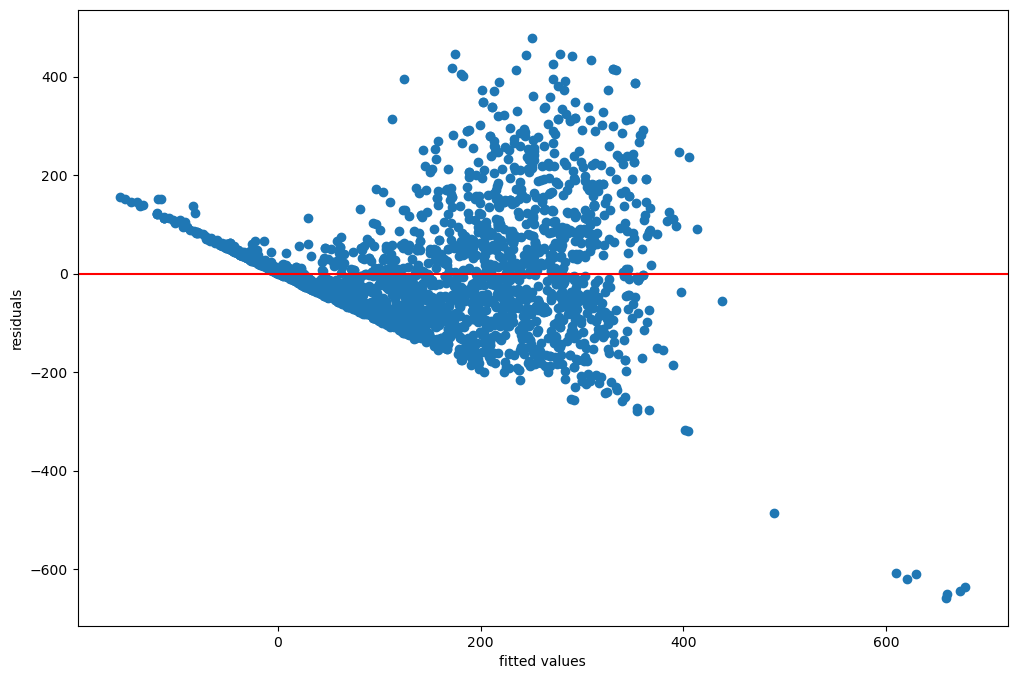

In [379]:
scatter(m5.fittedvalues, m5.resid)
axhline(y = 0, color = 'red')
xlabel('fitted values')
ylabel('residuals')
show()

In [ ]:
#założenie o stałości reszt nie jest spełnione

In [380]:
wine['predictions'] = m5.fittedvalues
wine['residuals'] = m5.resid

In [245]:
wine.head()

,Marital_Status,Income,MntWines,Age,Education_Graduation,Education_Master,Education_PhD,l_MntWines,lIncome,lAge,Income_2,Age_2,predictions,residuals
0,0,58138.0,317.5,65,1,0,0,5.760478,10.970575,4.174387,3.380027e+09,4225,4.643117,1.117361
1,0,46344.0,5.5,68,1,0,0,1.704748,10.743847,4.219508,2.147766e+09,4624,4.041782,-2.337034
2,1,71613.0,213.0,57,1,0,0,5.361292,11.179032,4.043051,5.128422e+09,3249,5.142868,0.218424
3,1,26646.0,5.5,38,1,0,0,1.704748,10.190394,3.637586,7.100093e+08,1444,2.195627,-0.490879
4,1,58293.0,86.5,41,0,0,1,4.460144,10.973237,3.713572,3.398074e+09,1681,4.667270,-0.207126


<AxesSubplot:xlabel='predictions', ylabel='residuals'>

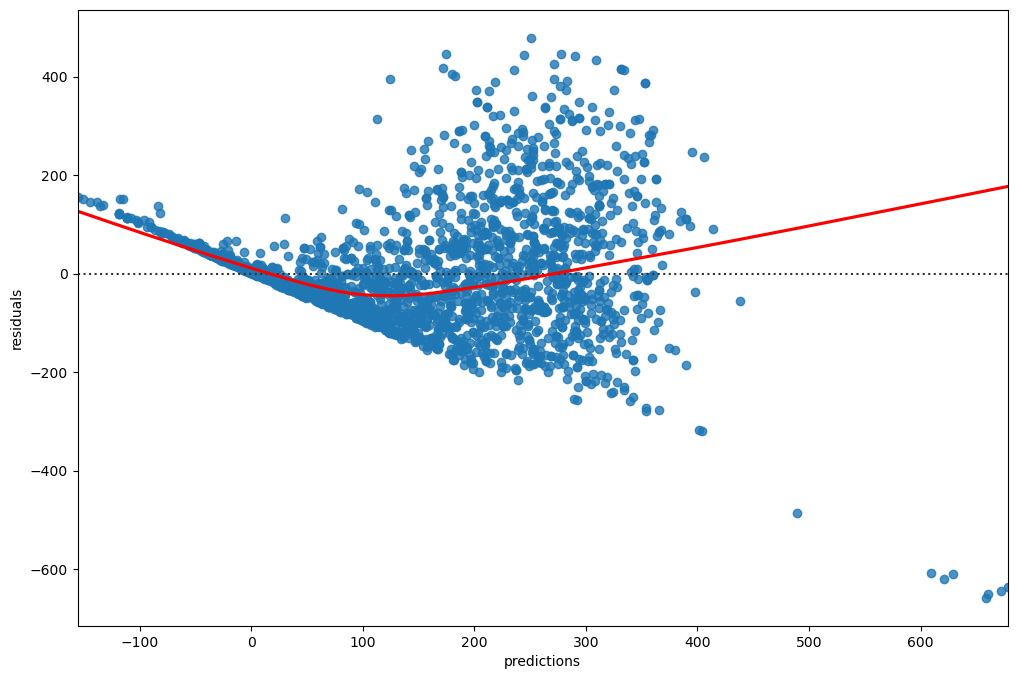

In [381]:
sns.residplot(data = wine, x = 'predictions', y = 'residuals', lowess = True, line_kws = dict(color = 'red'))

In [382]:
import statsmodels.stats.api as sms

In [383]:
test1 = sms.het_breuschpagan(m5.resid, m5.model.exog)

In [384]:
from statsmodels.compat import lzip

In [385]:
names1 = ['lagrange multiplier statistic', 'p-value','fvalue ', 'f_pvalue ']

In [386]:
lzip(names1, test1)

[('lagrange multiplier statistic', 418.200219759279),
 ('p-value', 3.246402719118647e-89),
 ('fvalue ', 128.79526259785524),
 ('f_pvalue ', 6.763858534708652e-99)]

In [ ]:
#odrzucamy H0 o homoskedastyczności reszt, reszty są heteroskedastyczne

In [ ]:
#WHITE ROBUST COVARIANCE

In [389]:
test2 = sms.het_white(m5.resid, m5.model.exog)
test2

AssertionError: 

In [390]:
lzip(names1, test2)

[('lagrange multiplier statistic', 527.4187440511812),
 ('p-value', 1.4185747338257165e-103),
 ('fvalue ', 49.21434850871924),
 ('f_pvalue ', 4.181102590962244e-119)]

In [391]:
m1_2 = smf.ols(formula = 'l_MntWines ~ lIncome + Age + Education_Graduation +Education_Master +Education_PhD', data = wine).fit()
m1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_MntWines   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     742.2
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:01:03   Log-Likelihood:                -3392.2
No. Observations:                2200   AIC:                             6796.
Df Residuals:                    2194   BIC:                             6831.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -27.1611      0.522    -52.014      0.000     -28.185     -26.137
lIncome                  2.7323      0.051     53.310      0.000       2.632       2.833
Age                      0.0108      0.002      5.071      0.000       0.007       0.015
Education_Graduation     1.1140      0.173      6.444      0.000       0.775       1.453
Education_Master         1.1220      0.176      6.375      0.000       0.777       1.467
Education_PhD            1.3857      0.179      7.747      0.000       1.035       1.736
==============================================================================
Omnibus:                      549.536   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3941.455
Skew:                          -0.984   Prob(JB):                         0.00
Kurtosis:                       9.255   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [392]:
m5 = smf.ols(formula = 'MntWines ~ Income +Income_2 + Education_Graduation +Education_Master ', data = wine).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MntWines   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     529.0
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          9.72e-320
Time:                        18:01:39   Log-Likelihood:                -13661.
No. Observations:                2200   AIC:                         2.733e+04
Df Residuals:                    2195   BIC:                         2.736e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -127.6387      8.666    -14.728      0.000    -144.633    -110.644
Income                   0.0065      0.000     44.531      0.000       0.006       0.007
Income_2             -9.554e-09   3.77e-10    -25.335      0.000   -1.03e-08   -8.81e-09
Education_Graduation   -39.1906      6.369     -6.153      0.000     -51.681     -26.700
Education_Master       -32.3550      7.316     -4.423      0.000     -46.702     -18.009
==============================================================================
Omnibus:                      242.047   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1129.002
Skew:                           0.427   Prob(JB):                    6.92e-246
Kurtosis:                       6.404   Cond. No.                     4.30e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [254]:
m1_2R = smf.ols(formula = 'l_MntWines ~ lIncome + Age + Education_Graduation +Education_Master +Education_PhD', data = wine).fit()
m1_2R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_MntWines   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     781.4
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:10:33   Log-Likelihood:                -3354.2
No. Observations:                2199   AIC:                             6720.
Df Residuals:                    2193   BIC:                             6754.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -27.6631      0.517    -53.524      0.000     -28.677     -26.650
lIncome                  2.7863      0.051     54.858      0.000       2.687       2.886
Age                      0.0101      0.002      4.823      0.000       0.006       0.014
Education_Graduation     1.0798      0.170      6.348      0.000       0.746       1.413
Education_Master         1.0804      0.173      6.239      0.000       0.741       1.420
Education_PhD            1.3398      0.176      7.612      0.000       0.995       1.685
==============================================================================
Omnibus:                      394.934   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2189.981
Skew:                          -0.730   Prob(JB):                         0.00
Kurtosis:                       7.666   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [393]:
m5R = smf.ols(formula = 'MntWines ~ Income +Income_2 + Education_Graduation +Education_Master ', data = wine).fit(cov_type = 'HC0')
m5R.summary()

C:\Users\karol\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MntWines   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     307.3
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          1.47e-166
Time:                        18:03:19   Log-Likelihood:                -13661.
No. Observations:                2200   AIC:                         2.733e+04
Df Residuals:                    2195   BIC:                         2.736e+04
Df Model:                           4                                         
Covariance Type:                  HC0                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -127.6387      9.771    -13.063      0.000    -146.789    -108.489
Income                   0.0065      0.000     30.346      0.000       0.006       0.007
Income_2             -9.554e-09   3.07e-10    -31.081      0.000   -1.02e-08   -8.95e-09
Education_Graduation   -39.1906      7.210     -5.435      0.000     -53.323     -25.059
Education_Master       -32.3550      8.080     -4.004      0.000     -48.191     -16.519
==============================================================================
Omnibus:                      242.047   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1129.002
Skew:                           0.427   Prob(JB):                    6.92e-246
Kurtosis:                       6.404   Cond. No.                     4.30e+10
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 4.3e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [394]:
Stargazer([m5, m5R])

In [255]:
Stargazer([m1_2, m1_2R])

In [ ]:
#macierz odporna na występowanie heteroskedastyczności reszt

In [256]:
wine['residuals2'] = m1_2.resid *m1_2.resid

In [395]:
wine['residuals2'] = m5.resid *m5.resid

In [257]:
m1_3 = smf.ols(formula = 'residuals2 ~ lIncome + Age + Education_Graduation +Education_Master +Education_PhD', data = wine).fit()
m1_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             residuals2   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     13.27
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           9.28e-13
Time:                        10:10:59   Log-Likelihood:                -5641.1
No. Observations:                2199   AIC:                         1.129e+04
Df Residuals:                    2193   BIC:                         1.133e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               12.8155      1.462      8.764      0.000       9.948      15.683
lIncome                 -1.0586      0.144     -7.367      0.000      -1.340      -0.777
Age                     -0.0045      0.006     -0.761      0.447      -0.016       0.007
Education_Graduation    -0.0162      0.481     -0.034      0.973      -0.960       0.927
Education_Master        -0.0692      0.490     -0.141      0.888      -1.030       0.891
Education_PhD            0.3520      0.498      0.707      0.480      -0.624       1.328
==============================================================================
Omnibus:                     3882.216   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4136351.719
Skew:                          12.280   Prob(JB):                         0.00
Kurtosis:                     214.048   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [396]:
m5_r = smf.ols(formula = 'residuals2 ~ Income +Income_2 + Education_Graduation +Education_Master ', data = wine).fit()
m5_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             residuals2   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     128.8
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           6.76e-99
Time:                        18:05:01   Log-Likelihood:                -25824.
No. Observations:                2200   AIC:                         5.166e+04
Df Residuals:                    2195   BIC:                         5.169e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.456e+04   2182.439     -6.674      0.000   -1.88e+04   -1.03e+04
Income                   0.7505      0.037     20.379      0.000       0.678       0.823
Income_2             -8.944e-07    9.5e-08     -9.418      0.000   -1.08e-06   -7.08e-07
Education_Graduation  -1.05e+04   1604.033     -6.547      0.000   -1.36e+04   -7355.414
Education_Master     -7719.2496   1842.373     -4.190      0.000   -1.13e+04   -4106.272
==============================================================================
Omnibus:                     2397.433   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           207776.202
Skew:                           5.410   Prob(JB):                         0.00
Kurtosis:                      49.363   Cond. No.                     4.30e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#zmienna lIncome wpływa na heteroskedastyczność reszt

In [258]:
import statsmodels.api as sm

In [259]:
import matplotlib.pyplot as plt

eval_env: 1


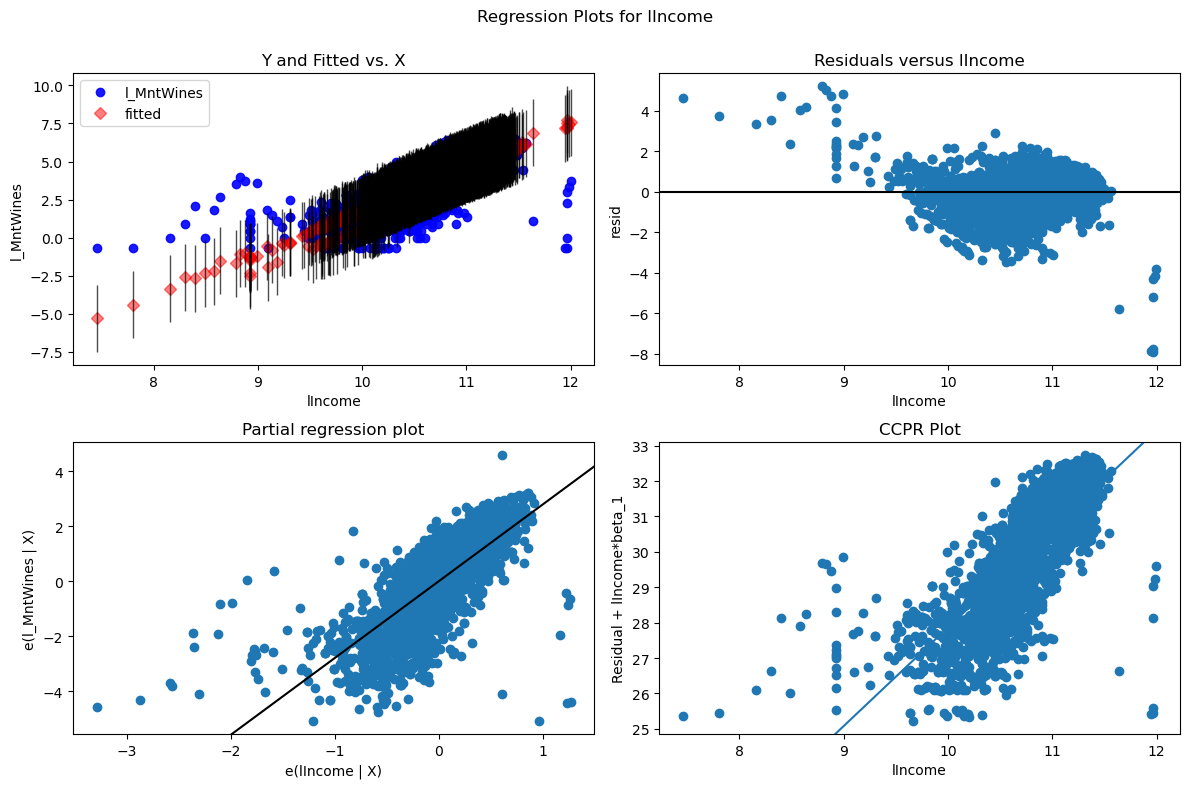

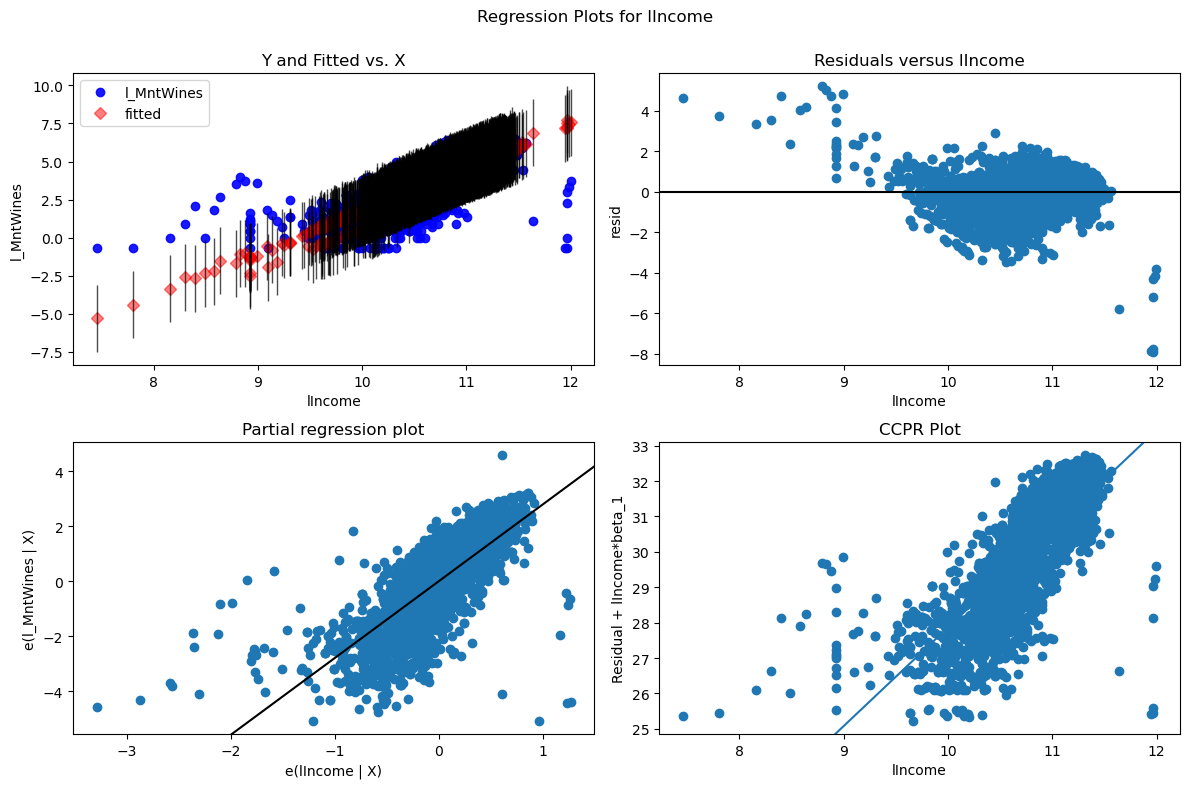

In [260]:
plt.rc('figure', figsize = (12,8))
sm.graphics.plot_regress_exog(m1_2, 'lIncome')

In [ ]:
#TEST RESET

In [261]:
from statsmodels.stats.diagnostic import linear_reset

In [400]:
linear_reset(m5, power = 2, test_type = "fitted")

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=7.299370900580883, p-value=0.006897875805551697, df_denom=1>

In [262]:
linear_reset(m1_2, power = 2, test_type = "fitted")

C:\Users\karol\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=185.41363986080236, p-value=3.187846220569938e-42, df_denom=1>

In [263]:
linear_reset(m1_2, power = 3, test_type = "fitted")

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=351.3185524129842, p-value=5.154014646757155e-77, df_denom=2>

In [ ]:
#brak podstaw zeby odrzucić H0 o liniowej postaci modelu, estymator MNK nie jest obciążony

In [ ]:
#TEST CHOWA
#rozbijamy zmienne zero-jedynkowe

In [264]:
m1_2 = smf.ols(formula = 'l_MntWines ~ lIncome + Age + Education_Graduation +Education_Master +Education_PhD', data = wine).fit()
m1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_MntWines   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     781.4
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:11:52   Log-Likelihood:                -3354.2
No. Observations:                2199   AIC:                             6720.
Df Residuals:                    2193   BIC:                             6754.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -27.6631      0.517    -53.524      0.000     -28.677     -26.650
lIncome                  2.7863      0.051     54.858      0.000       2.687       2.886
Age                      0.0101      0.002      4.823      0.000       0.006       0.014
Education_Graduation     1.0798      0.170      6.348      0.000       0.746       1.413
Education_Master         1.0804      0.173      6.239      0.000       0.741       1.420
Education_PhD            1.3398      0.176      7.612      0.000       0.995       1.685
==============================================================================
Omnibus:                      394.934   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2189.981
Skew:                          -0.730   Prob(JB):                         0.00
Kurtosis:                       7.666   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [268]:
m1_2.ssr

2720.306097978307

In [266]:
m1_2_1 = smf.ols(formula = 'l_MntWines ~ lIncome + Age + Education_Graduation +Education_Master +Education_PhD', data = wine[wine["Education_Graduation"]==1]).fit()
m1_2_1.summary()

C:\Users\karol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_MntWines   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     1033.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          4.65e-254
Time:                        10:12:08   Log-Likelihood:                -1664.5
No. Observations:                1112   AIC:                             3335.
Df Residuals:                    1109   BIC:                             3350.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -13.8066      0.348    -39.659      0.000     -14.490     -13.124
lIncome                  2.8680      0.066     43.637      0.000       2.739       2.997
Age                      0.0130      0.003      4.525      0.000       0.007       0.019
Education_Graduation   -13.8066      0.348    -39.659      0.000     -14.490     -13.124
Education_Master              0          0        nan        nan           0           0
Education_PhD                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                      254.620   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1992.648
Skew:                          -0.829   Prob(JB):                         0.00
Kurtosis:                       9.345   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [267]:
m1_2_1.ssr

1299.4750999603566

In [270]:
m1_2_2 = smf.ols(formula = 'l_MntWines ~ lIncome + Age + Education_Graduation +Education_Master +Education_PhD', data = wine[wine["Education_Graduation"]==0]).fit()
m1_2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_MntWines   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     465.1
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          3.08e-233
Time:                        10:12:25   Log-Likelihood:                -1685.0
No. Observations:                1087   AIC:                             3380.
Df Residuals:                    1082   BIC:                             3405.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -26.5177      0.778    -34.078      0.000     -28.045     -24.991
lIncome                  2.6824      0.079     33.976      0.000       2.527       2.837
Age                      0.0075      0.003      2.450      0.014       0.001       0.014
Education_Graduation  6.053e-16   8.72e-17      6.944      0.000    4.34e-16    7.76e-16
Education_Master         1.1912      0.185      6.452      0.000       0.829       1.553
Education_PhD            1.4699      0.189      7.759      0.000       1.098       1.842
==============================================================================
Omnibus:                      147.076   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.554
Skew:                          -0.618   Prob(JB):                    3.08e-117
Kurtosis:                       6.212   Cond. No.                     5.32e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [271]:
m1_2_2.ssr

1413.081946653363

In [272]:
m1_2.nobs

2199.0

In [273]:
len(m1_2.params)

6

In [274]:
licznik = (m1_2.ssr - m1_2_1.ssr - m1_2_2.ssr)/len(m1_2.params)*1

In [275]:
mianownik = (m1_2_1.ssr+m1_2_2.ssr)/(m1_2.nobs - 2*len(m1_2.params))

In [276]:
F = licznik/mianownik
F

1.0412791966599295

In [277]:
import scipy.stats

In [278]:
scipy.stats.f.ppf(q = 1-0.05, dfn =len(m1_2.params)*1 , dfd = m1_2.nobs - 2*len(m1_2.params))

2.10272383312575

In [ ]:
#Brak podstaw do odrzucenia H0, statystyka F nie wpada do obszaru krytycznego, parametry w podpróbkach są takie same, nie ma
#kłopotu z liniowością w naszym modelu

In [279]:
m1_2_3 = smf.ols(formula = 'l_MntWines ~ lIncome + Age + Education_Graduation +Education_Master +Education_PhD', data = wine[wine["Education_Master"]==1]).fit()
m1_2_3.summary()

C:\Users\karol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_MntWines   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     534.1
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          3.75e-130
Time:                        10:12:54   Log-Likelihood:                -826.57
No. Observations:                 559   AIC:                             1659.
Df Residuals:                     556   BIC:                             1672.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -14.1103      0.501    -28.184      0.000     -15.094     -13.127
lIncome                  2.9354      0.097     30.162      0.000       2.744       3.127
Age                      0.0108      0.004      2.658      0.008       0.003       0.019
Education_Graduation          0          0        nan        nan           0           0
Education_Master       -14.1103      0.501    -28.184      0.000     -15.094     -13.127
Education_PhD                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                       20.441   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.985
Skew:                          -0.210   Prob(JB):                     3.42e-09
Kurtosis:                       4.224   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [280]:
m1_2_3.ssr

629.9127363392247

In [281]:
m1_2_4 = smf.ols(formula = 'l_MntWines ~ lIncome + Age + Education_Graduation +Education_Master +Education_PhD', data = wine[wine["Education_Master"]==0]).fit()
m1_2_4.summary()

C:\Users\karol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_MntWines   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     712.5
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:12:59   Log-Likelihood:                -2524.3
No. Observations:                1640   AIC:                             5059.
Df Residuals:                    1635   BIC:                             5086.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -27.1150      0.603    -44.958      0.000     -28.298     -25.932
lIncome                  2.7333      0.060     45.858      0.000       2.616       2.850
Age                      0.0096      0.002      3.902      0.000       0.005       0.014
Education_Graduation     1.1305      0.175      6.472      0.000       0.788       1.473
Education_Master              0          0        nan        nan           0           0
Education_PhD            1.3977      0.181      7.711      0.000       1.042       1.753
==============================================================================
Omnibus:                      358.794   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2184.590
Skew:                          -0.878   Prob(JB):                         0.00
Kurtosis:                       8.375   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [282]:
m1_2_4.ssr

2086.034910732966

In [283]:
licznik_1= (m1_2.ssr - m1_2_3.ssr - m1_2_4.ssr)/len(m1_2.params)*1

In [284]:
mianownik1 = (m1_2_3.ssr+m1_2_4.ssr)/(m1_2.nobs - 2*len(m1_2.params))

In [285]:
F1 = licznik_1/mianownik1
F1

0.5849359272414181

In [286]:
m1_2_5 = smf.ols(formula = 'l_MntWines ~ lIncome + Age + Education_Graduation +Education_Master +Education_PhD', data = wine[wine["Education_PhD"]==1]).fit()
m1_2_5.summary()

C:\Users\karol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_MntWines   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     179.6
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           7.35e-59
Time:                        10:13:10   Log-Likelihood:                -760.29
No. Observations:                 480   AIC:                             1527.
Df Residuals:                     477   BIC:                             1539.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -11.1734      0.709    -15.755      0.000     -12.567      -9.780
lIncome                  2.4527      0.131     18.719      0.000       2.195       2.710
Age                      0.0038      0.005      0.811      0.418      -0.005       0.013
Education_Graduation          0          0        nan        nan           0           0
Education_Master              0          0        nan        nan           0           0
Education_PhD          -11.1734      0.709    -15.755      0.000     -12.567      -9.780
==============================================================================
Omnibus:                      119.120   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              468.906
Skew:                          -1.065   Prob(JB):                    1.51e-102
Kurtosis:                       7.349   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [287]:
m1_2_5.ssr

667.67679019867

In [288]:
m1_2_6 = smf.ols(formula = 'l_MntWines ~ lIncome + Age + Education_Graduation +Education_Master +Education_PhD', data = wine[wine["Education_PhD"]==0]).fit()
m1_2_6.summary()

C:\Users\karol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_MntWines   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     879.5
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:13:18   Log-Likelihood:                -2585.1
No. Observations:                1719   AIC:                             5180.
Df Residuals:                    1714   BIC:                             5207.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -28.3416      0.549    -51.598      0.000     -29.419     -27.264
lIncome                  2.8478      0.055     52.095      0.000       2.741       2.955
Age                      0.0117      0.002      5.005      0.000       0.007       0.016
Education_Graduation     1.0142      0.168      6.052      0.000       0.685       1.343
Education_Master         1.0147      0.171      5.950      0.000       0.680       1.349
Education_PhD                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                      257.026   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1421.879
Skew:                          -0.575   Prob(JB):                    1.75e-309
Kurtosis:                       7.305   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [289]:
m1_2_6.ssr

2037.1567529094057

In [290]:
licznik_2= (m1_2.ssr - m1_2_5.ssr - m1_2_6.ssr)/len(m1_2.params)*1

In [291]:
mianownik_2 = (m1_2_5.ssr+m1_2_6.ssr)/(m1_2.nobs - 2*len(m1_2.params))

In [292]:
F2 = licznik_2/mianownik_2
F2

2.0850622266828522

In [ ]:
#WSZYSTKO GIIT Z LINIOWOŚCIĄ

In [ ]:
#SKŁADNIK LOSOWY MA ROZKŁAD NORMALNY - test JARQUE-BERA ~ opcjonalnie

(array([  3.,   0.,   0.,   1.,   1.,   2.,   4.,  23.,  55., 156., 278.,
        406., 621., 484., 133.,  16.,   3.,   4.,   3.,   6.]),
 array([-7.90417385, -7.24894118, -6.59370851, -5.93847584, -5.28324316,
        -4.62801049, -3.97277782, -3.31754515, -2.66231247, -2.0070798 ,
        -1.35184713, -0.69661446, -0.04138178,  0.61385089,  1.26908356,
         1.92431623,  2.5795489 ,  3.23478158,  3.89001425,  4.54524692,
         5.20047959]),
 <BarContainer object of 20 artists>)

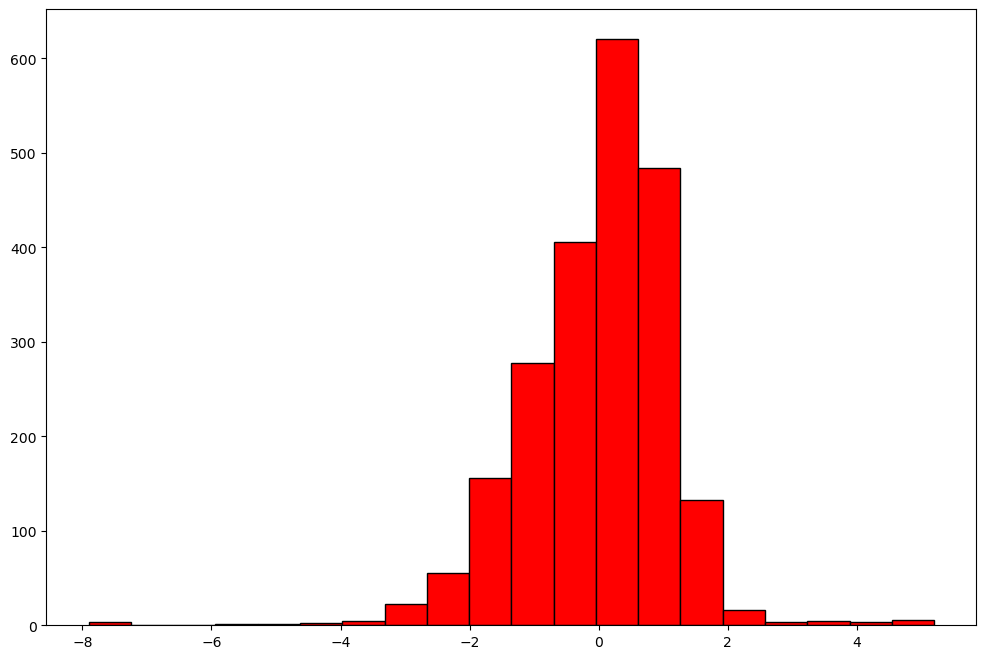

In [294]:
hist(m1_2.resid, bins = 20, color = "red", edgecolor = "black")

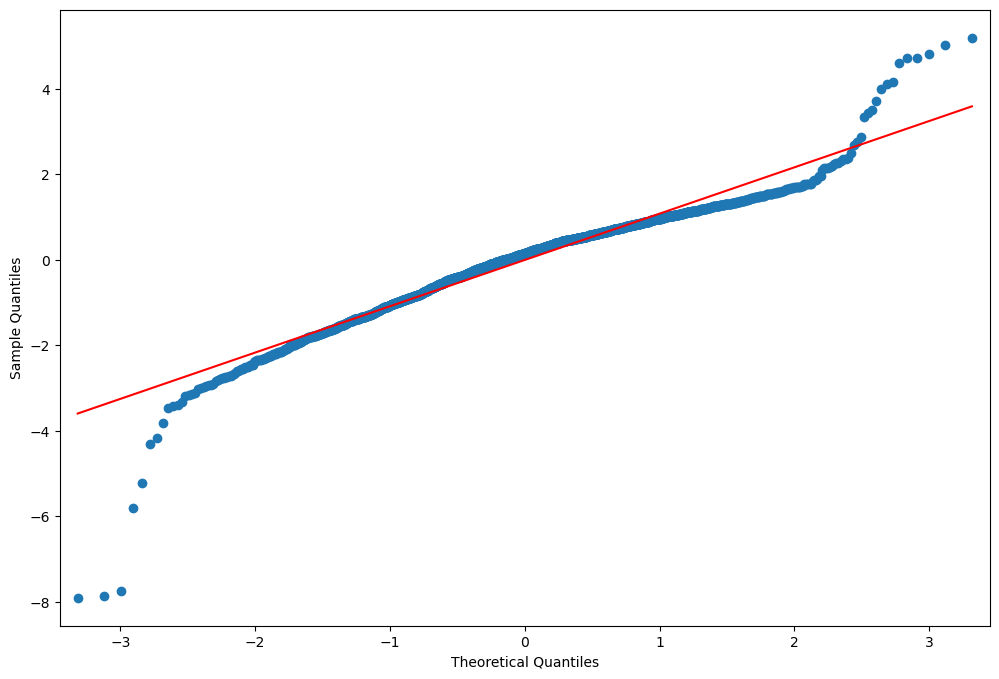

In [293]:
sm.qqplot(m1_2.resid, line = "r")
show()

In [ ]:
#na rozkład normalny to nie wygląda, za bardzo odbiega od czerwonej linii

In [297]:
test4 = sms.jarque_bera(m1_2.resid)
test4

(2189.980618174083, 0.0, -0.7298380450523908, 7.665930530038768)

In [150]:
names2 = ["The Jarque-Bera test statistic", "The pvalue of the test statistic", "skew", "kurtosis"]

In [298]:
lzip(names2, test4)

[('The Jarque-Bera test statistic', 2189.980618174083),
 ('The pvalue of the test statistic', 0.0),
 ('skew', -0.7298380450523908),
 ('kurtosis', 7.665930530038768)]

In [ ]:
#OBSERWACJE NIETYPOWE I BŁĘDNE

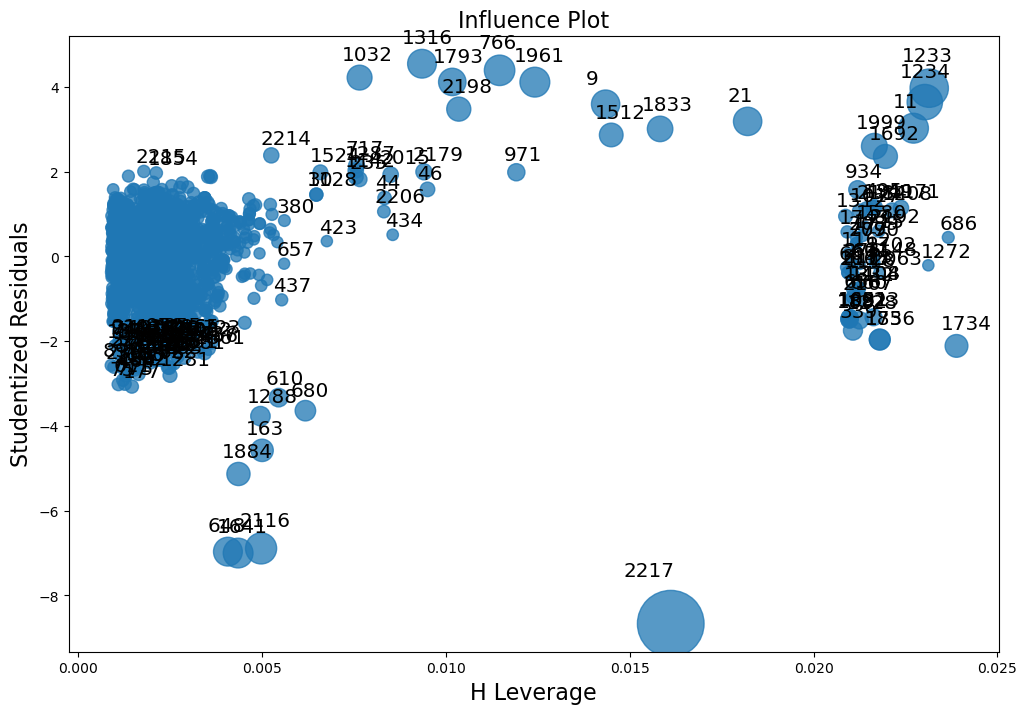

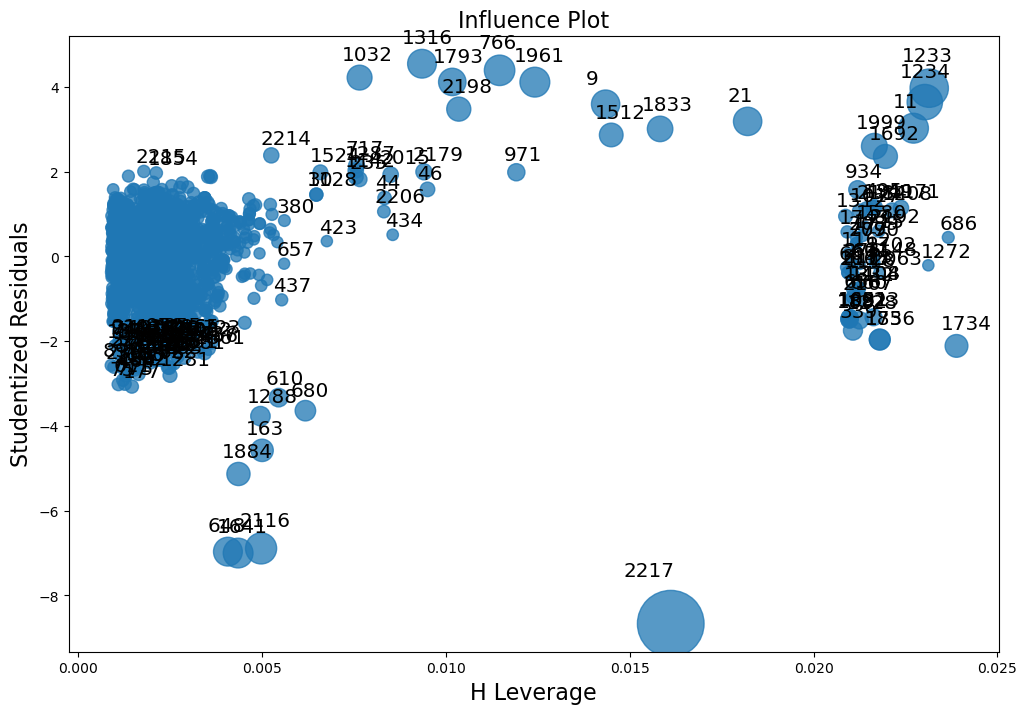

In [152]:
sm.graphics.influence_plot(m1_2, criterion = "Cooks")

In [165]:
h_leverage = (2*len(m1_2.params))/m1_2.nobs
round(h_leverage, 2)

0.01

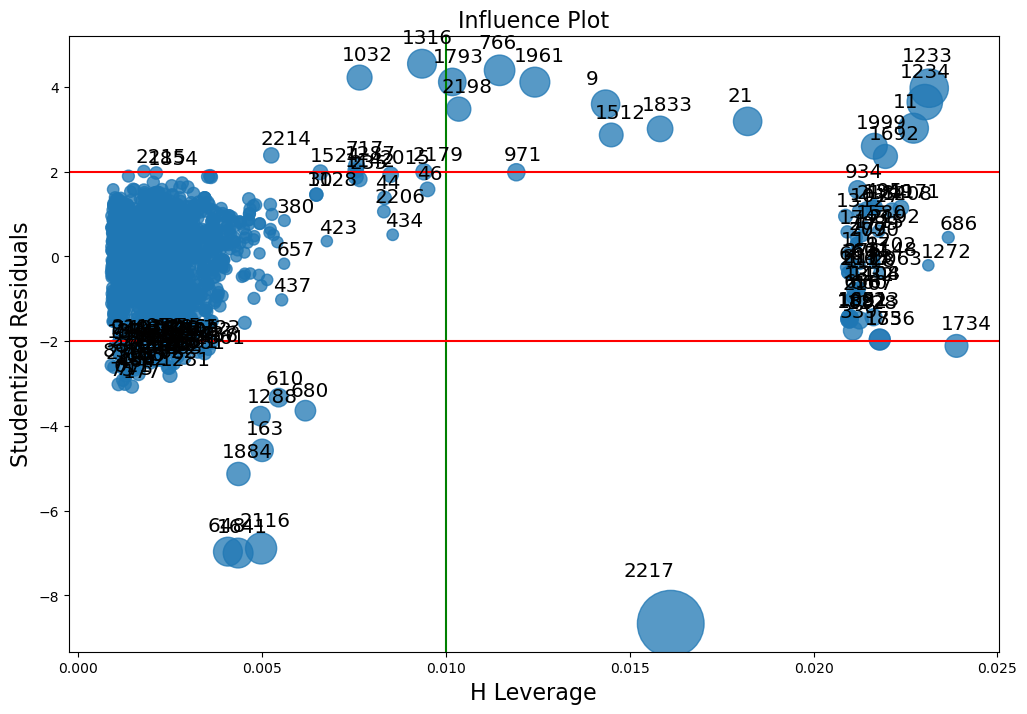

In [166]:
sm.graphics.influence_plot(m1_2, criterion = "Cooks")
axvline(x = round(h_leverage, 2), color = "green")
axhline( y = -2, color = 'red')
axhline(y = 2, color = 'red')
show()

In [167]:
cooks = m1_2.get_influence().cooks_distance[0]

In [168]:
critical_cooks = 4/m1_2.nobs
critical_cooks

0.0018181818181818182

In [158]:
out = cooks > critical_cooks

In [161]:
def get_vif(exogs, data):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    exogs (list): list of exogenous/independent variables
    data (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif


In [162]:
wine.columns

Index(['Marital_Status', 'Income', 'MntWines', 'Age', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'l_MntWines', 'lIncome', 'lAge',
       'Income_2', 'Age_2', 'predictions', 'residuals', 'residuals2'],
      dtype='object')

In [295]:
exogs = ["lIncome", 'Age','Education_Graduation', 'Education_Master', 'Education_PhD' ]

In [296]:
get_vif(exogs = exogs, data = wine )

,VIF,Tolerance
lIncome,1.131390,0.883868
Age,1.068084,0.936256
Education_Graduation,12.819186,0.078008
Education_Master,10.077403,0.099232
Education_PhD,9.369400,0.106730
